In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
import copy as cp

In [93]:
import pickle

# Load Data

In [41]:
df_blast2go = pd.read_csv('data/blast2go_go_table.txt', delimiter = "\t")

In [42]:
df_blast2go

,Unnamed: 0,Tags,SeqName,Description,Length,#Hits,e-Value,sim mean,#GO,GO IDs,GO Names,Enzyme Codes,Enzyme Names,InterPro IDs,InterPro GO IDs,InterPro GO Names
0,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00005|dnaA|chromosomal,chromosomal replication initiator protein DnaA,1317,20.0,0.000000e+00,94.75,5.0,F:GO:0003688; F:GO:0005524; C:GO:0005737; P:GO...,F:DNA replication origin binding; F:ATP bindin...,NaN,NaN,IPR020591 (PRINTS); IPR013159 (SMART); IPR0035...,F:GO:0003677; F:GO:0003688; F:GO:0005524; P:GO...,F:DNA binding; F:DNA replication origin bindin...
1,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00010||DNA,DNA polymerase III subunit beta,1101,20.0,0.000000e+00,89.35,8.0,F:GO:0003677; F:GO:0003887; C:GO:0005737; P:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...,EC:2.7.7.7,DNA-directed DNA polymerase,IPR001001 (SMART); G3DSA:3.10.150.10 (GENE3D);...,F:GO:0003677; F:GO:0003887; P:GO:0006260; F:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...
2,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00015|recF|DNA,DNA replication/repair protein RecF,1080,20.0,0.000000e+00,80.63,6.0,F:GO:0003697; F:GO:0005524; C:GO:0005737; P:GO...,F:single-stranded DNA binding; F:ATP binding; ...,NaN,NaN,IPR042174 (G3DSA:1.20.1050.GENE3D); IPR003395 ...,F:GO:0003697; F:GO:0005524; P:GO:0006281,F:single-stranded DNA binding; F:ATP binding; ...
3,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00020|gyrB|DNA,DNA topoisomerase (ATP-hydrolyzing) subunit B,2415,20.0,0.000000e+00,94.67,8.0,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...,EC:3.6.1.3; EC:5.6.2.2; EC:3.6.1.15,Adenosinetriphosphatase; n/a; Nucleoside-triph...,PR00418 (PRINTS); IPR000565 (PRINTS); IPR00359...,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...
4,True,"[INTERPRO, BLASTED]",EQU24_RS00025||hypothetical,membrane protein,237,20.0,1.550160e-49,83.50,NaN,NaN,NaN,NaN,NaN,no IPS match,no IPS match,no IPS match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22135|mnmE|tRNA,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,1347,20.0,0.000000e+00,89.80,6.0,F:GO:0003924; F:GO:0005515; F:GO:0005525; C:GO...,F:GTPase activity; F:protein binding; F:GTP bi...,EC:3.6.1.15,Nucleoside-triphosphate phosphatase,IPR004520 (TIGRFAM); IPR006073 (PFAM); IPR0258...,F:GO:0003924; F:GO:0005515; F:GO:0005525; P:GO...,F:GTPase activity; F:protein binding; F:GTP bi...
4369,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22140|yidC|membrane,membrane protein insertase YidC,1698,20.0,0.000000e+00,86.48,5.0,C:GO:0005886; P:GO:0015031; C:GO:0016021; F:GO...,C:plasma membrane; P:protein transport; C:inte...,NaN,NaN,IPR001708 (PRINTS); IPR001708 (PRINTS); IPR038...,C:GO:0016021; F:GO:0032977,C:integral component of membrane; F:membrane i...
4370,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22145|yidD|membrane,membrane protein insertion efficiency factor YidD,222,20.0,5.161060e-47,88.95,1.0,C:GO:0005886,C:plasma membrane,NaN,NaN,IPR002696 (SMART); IPR002696 (TIGRFAM); IPR002...,no GO terms,no GO terms
4371,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22150|rnpA|ribonuclease,ribonuclease P protein component,369,20.0,1.697640e-74,88.38,4.0,F:GO:0000049; P:GO:0001682; F:GO:0004526; P:GO...,F:tRNA binding; P:tRNA 5'-leader removal; F:ri...,EC:3.1.30; EC:3.1.26; EC:3.1.26.5,Acting on ester bonds; Acting on ester bonds; ...,IPR014721 (G3DSA:3.30.230.GENE3D); IPR000100 (...,F:GO:0000049; F:GO:0004526; P:GO:0008033,F:tRNA binding; F:ribonuclease P activity; P:t...


In [43]:
df_gofeat = pd.read_csv('data/gofeat_go_annotation.txt', delimiter = "\t")

In [44]:
df_gofeat

,#,Locus tag,Length,Product,Completeness,Gene onthology,SEED,Protein databases,Genome annotation databases,Family and domain databases,Crossreferences
0,1,EQU24_RS00005|dnaA|chromosomal replication ini...,438.0,Chromosomal replication initiator protein DnaA,99.77% [1314/1317],GO:0003688 - DNA replication origin binding|GO...,NaN,Uniprot (A0A4P9UMW3)|Interpro (A0A4P9UMW3),KEGG (mbur:EQU24_00005)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003593)|Interpro (IPR001957)|Inte...,EMBL (CP035467)
1,2,EQU24_RS00010||DNA polymerase III subunit beta,366.0,Beta sliding clamp,99.73% [1098/1101],GO:0003677 - DNA binding|GO:0003887 - DNA-dire...,NaN,Uniprot (A0A4P9UIN3)|Interpro (A0A4P9UIN3),KEGG (mbur:EQU24_00010)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001001)|Interpro (IPR022635)|Inte...,EMBL (CP035467)
2,3,EQU24_RS00015|recF|DNA replication/repair prot...,359.0,DNA replication and repair protein RecF,99.72% [1077/1080],GO:0003697 - single-stranded DNA binding|GO:00...,NaN,Uniprot (A0A4P9UIH3)|Interpro (A0A4P9UIH3),KEGG (mbur:EQU24_00015)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001238)|Interpro (IPR027417)|Inte...,EMBL (CP035467)
3,4,EQU24_RS00020|gyrB|DNA topoisomerase (ATP-hydr...,804.0,DNA gyrase subunit B,99.88% [2412/2415],GO:0003677 - DNA binding|GO:0003918 - DNA topo...,NaN,Uniprot (A0A4P9UI83)|Interpro (A0A4P9UI83),KEGG (mbur:EQU24_00020)|KEGG GM (mbur:EQU24_00...,Interpro (IPR002288)|Interpro (IPR011557)|Inte...,EMBL (CP035467)
4,5,EQU24_RS00025||hypothetical protein,77.0,Uncharacterized protein,97.47% [231/237],NaN,NaN,Uniprot (A0A4P9UJZ0)|Interpro (A0A4P9UJZ0),KEGG (mbur:EQU24_00025)|KEGG GM (mbur:EQU24_00...,NaN,EMBL (CP035467)
...,...,...,...,...,...,...,...,...,...,...,...
4368,4369,EQU24_RS22135|mnmE|tRNA uridine-5-carboxymethy...,447.0,tRNA modification GTPase MnmE,99.55% [1341/1347],GO:0003924 - GTPase activity|GO:0005525 - GTP ...,NaN,Uniprot (A0A4P9USW8)|Interpro (A0A4P9USW8),KEGG (mbur:EQU24_22115)|KEGG GM (mbur:EQU24_22...,Interpro (IPR031168)|Interpro (IPR018948)|Inte...,EMBL (CP035467)
4369,4370,EQU24_RS22140|yidC|membrane protein insertase ...,565.0,Membrane protein insertase YidC,99.82% [1695/1698],GO:0005886 - plasma membrane|GO:0015031 - prot...,NaN,Uniprot (A0A4V1IKE6)|Interpro (A0A4V1IKE6),KEGG (mbur:EQU24_22120)|KEGG GM (mbur:EQU24_22...,Interpro (IPR019998)|Interpro (IPR028055)|Inte...,EMBL (CP035467)
4370,4371,EQU24_RS22145|yidD|membrane protein insertion ...,73.0,Putative membrane protein insertion efficiency...,98.65% [219/222],GO:0005886 - plasma membrane,NaN,Uniprot (A0A4P9UXR4)|Interpro (A0A4P9UXR4),KEGG (mbur:EQU24_22125)|KEGG GM (mbur:EQU24_22...,Interpro (IPR002696)|Pfam (PF01809),EMBL (CP035467)
4371,4372,EQU24_RS22150|rnpA|ribonuclease P protein comp...,121.0,Ribonuclease P protein component,98.37% [363/369],GO:0000049 - tRNA binding|GO:0001682 - tRNA 5'...,NaN,Uniprot (A0A351UY10)|Interpro (A0A351UY10),NaN,Interpro (IPR020568)|Interpro (IPR014721)|Inte...,EMBL (DNKF01000037)


# Workflow

- separate out the loci as separate columns
- separate out the GO Term #
- Use new data frame to query based on the clusters generated previously --> bunch the ones of interest together 
    - this means that we need to have a compiled list of the EQU loci #s for the smaller groups of interest --> we have code for this already!
- Once groups of the GO Terms are found: 
    - Preliminary Stages: 
        - view the GO terms (with basic GO #)
        - view the whole row (with meta data)
    - Further Down: 
        - generate some way to visualize the GO terms listed (handling conditions even where there are unrelated GO terms ----> meaning there may be more than 1 DAG )

In [40]:
def go_term_trimmer(go_terms_all_loci, range_min, range_max):
    
    cleaned_terms = []
    
    for loci in go_terms_all_loci: 
    
        cleaned_loci = []

        for go_term in loci:

            cleaned_loci.append(go_term[range_min: range_max])

        cleaned_terms.append(cleaned_loci)
    
    return cleaned_terms

# Query-able Dataframe construction

## df_blast2go

In [45]:
df_expanded_tags_blast2go = df_blast2go['SeqName'].str.split('|', expand = True)

new_df_columns = list(df_blast2go.columns)  + ["locus_id", "gene_name", "product"]

df_blast2go_cleaned = df_blast2go.join(df_expanded_tags_blast2go)

df_blast2go_cleaned.columns = new_df_columns


df_blast2go_cleaned = df_blast2go_cleaned[df_blast2go_cleaned['GO IDs'].notna()]
df_blast2go_cleaned = df_blast2go_cleaned[df_blast2go_cleaned['InterPro GO IDs'].notna()]


df_blast2go_cleaned

,Unnamed: 0,Tags,SeqName,Description,Length,#Hits,e-Value,sim mean,#GO,GO IDs,GO Names,Enzyme Codes,Enzyme Names,InterPro IDs,InterPro GO IDs,InterPro GO Names,locus_id,gene_name,product
0,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00005|dnaA|chromosomal,chromosomal replication initiator protein DnaA,1317,20.0,0.000000e+00,94.75,5.0,F:GO:0003688; F:GO:0005524; C:GO:0005737; P:GO...,F:DNA replication origin binding; F:ATP bindin...,NaN,NaN,IPR020591 (PRINTS); IPR013159 (SMART); IPR0035...,F:GO:0003677; F:GO:0003688; F:GO:0005524; P:GO...,F:DNA binding; F:DNA replication origin bindin...,EQU24_RS00005,dnaA,chromosomal
1,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00010||DNA,DNA polymerase III subunit beta,1101,20.0,0.000000e+00,89.35,8.0,F:GO:0003677; F:GO:0003887; C:GO:0005737; P:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...,EC:2.7.7.7,DNA-directed DNA polymerase,IPR001001 (SMART); G3DSA:3.10.150.10 (GENE3D);...,F:GO:0003677; F:GO:0003887; P:GO:0006260; F:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...,EQU24_RS00010,,DNA
2,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00015|recF|DNA,DNA replication/repair protein RecF,1080,20.0,0.000000e+00,80.63,6.0,F:GO:0003697; F:GO:0005524; C:GO:0005737; P:GO...,F:single-stranded DNA binding; F:ATP binding; ...,NaN,NaN,IPR042174 (G3DSA:1.20.1050.GENE3D); IPR003395 ...,F:GO:0003697; F:GO:0005524; P:GO:0006281,F:single-stranded DNA binding; F:ATP binding; ...,EQU24_RS00015,recF,DNA
3,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00020|gyrB|DNA,DNA topoisomerase (ATP-hydrolyzing) subunit B,2415,20.0,0.000000e+00,94.67,8.0,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...,EC:3.6.1.3; EC:5.6.2.2; EC:3.6.1.15,Adenosinetriphosphatase; n/a; Nucleoside-triph...,PR00418 (PRINTS); IPR000565 (PRINTS); IPR00359...,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...,EQU24_RS00020,gyrB,DNA
7,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00040||TolC,TolC family protein,1257,20.0,0.000000e+00,84.76,2.0,F:GO:0015562; P:GO:0055085,F:efflux transmembrane transporter activity; P...,NaN,NaN,IPR003423 (PFAM); G3DSA:1.20.1600.10 (GENE3D);...,F:GO:0015562; P:GO:0055085,F:efflux transmembrane transporter activity; P...,EQU24_RS00040,,TolC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22135|mnmE|tRNA,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,1347,20.0,0.000000e+00,89.80,6.0,F:GO:0003924; F:GO:0005515; F:GO:0005525; C:GO...,F:GTPase activity; F:protein binding; F:GTP bi...,EC:3.6.1.15,Nucleoside-triphosphate phosphatase,IPR004520 (TIGRFAM); IPR006073 (PFAM); IPR0258...,F:GO:0003924; F:GO:0005515; F:GO:0005525; P:GO...,F:GTPase activity; F:protein binding; F:GTP bi...,EQU24_RS22135,mnmE,tRNA
4369,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22140|yidC|membrane,membrane protein insertase YidC,1698,20.0,0.000000e+00,86.48,5.0,C:GO:0005886; P:GO:0015031; C:GO:0016021; F:GO...,C:plasma membrane; P:protein transport; C:inte...,NaN,NaN,IPR001708 (PRINTS); IPR001708 (PRINTS); IPR038...,C:GO:0016021; F:GO:0032977,C:integral component of membrane; F:membrane i...,EQU24_RS22140,yidC,membrane
4370,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22145|yidD|membrane,membrane protein insertion efficiency factor YidD,222,20.0,5.161060e-47,88.95,1.0,C:GO:0005886,C:plasma membrane,NaN,NaN,IPR002696 (SMART); IPR002696 (TIGRFAM); IPR002...,no GO terms,no GO terms,EQU24_RS22145,yidD,membrane
4371,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22150|rnpA|ribonuclease,ribonuclease P protein component,369,20.0,1.697640e-74,88.38,4.0,F:GO:0000049; P:GO:0001682; F:GO:0004526; P:GO...,F:tRNA binding; P:tRNA 5'-leader removal; F:ri...,EC:3.1.30; EC:3.1.26; EC:3.1.26.5,Acting on ester bonds; Acting on ester bonds; ...,IPR014721 (G3DSA:3.30.230.GENE3D); IPR000100 (...,

In [46]:
# Intended to compare the two gene ontology tool outputs
df_blast2go_no_meta_cleaned = cp.copy(df_blast2go_cleaned)

meta_goterms = cp.copy(df_blast2go_cleaned["GO IDs"])

isolate_goterms = meta_goterms.str.split(";").apply(lambda x: [y.strip() for y in x])

df_blast2go_no_meta_cleaned["GO IDs"] = go_term_trimmer(isolate_goterms, 2, 12)


meta_inter_goterms = cp.copy(df_blast2go_cleaned["InterPro GO IDs"])

isolate_inter_goterms = meta_inter_goterms.str.split(";").apply(lambda x: [y.strip() for y in x])

df_blast2go_no_meta_cleaned["InterPro GO IDs"] = go_term_trimmer(isolate_inter_goterms, 2, 12)

df_blast2go_no_meta_cleaned["InterPro GO IDs"]

0       [GO:0003677, GO:0003688, GO:0005524, GO:000627...
1       [GO:0003677, GO:0003887, GO:0006260, GO:000840...
2                    [GO:0003697, GO:0005524, GO:0006281]
3       [GO:0003677, GO:0003918, GO:0005524, GO:000569...
7                                [GO:0015562, GO:0055085]
                              ...                        
4368     [GO:0003924, GO:0005515, GO:0005525, GO:0006400]
4369                             [GO:0016021, GO:0032977]
4370                                          [ GO terms]
4371                 [GO:0000049, GO:0004526, GO:0008033]
4372                 [GO:0003735, GO:0005840, GO:0006412]
Name: InterPro GO IDs, Length: 3411, dtype: object

In [47]:
df_blast2go_no_meta_cleaned

,Unnamed: 0,Tags,SeqName,Description,Length,#Hits,e-Value,sim mean,#GO,GO IDs,GO Names,Enzyme Codes,Enzyme Names,InterPro IDs,InterPro GO IDs,InterPro GO Names,locus_id,gene_name,product
0,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00005|dnaA|chromosomal,chromosomal replication initiator protein DnaA,1317,20.0,0.000000e+00,94.75,5.0,"[GO:0003688, GO:0005524, GO:0005737, GO:000627...",F:DNA replication origin binding; F:ATP bindin...,NaN,NaN,IPR020591 (PRINTS); IPR013159 (SMART); IPR0035...,"[GO:0003677, GO:0003688, GO:0005524, GO:000627...",F:DNA binding; F:DNA replication origin bindin...,EQU24_RS00005,dnaA,chromosomal
1,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00010||DNA,DNA polymerase III subunit beta,1101,20.0,0.000000e+00,89.35,8.0,"[GO:0003677, GO:0003887, GO:0005737, GO:000626...",F:DNA binding; F:DNA-directed DNA polymerase a...,EC:2.7.7.7,DNA-directed DNA polymerase,IPR001001 (SMART); G3DSA:3.10.150.10 (GENE3D);...,"[GO:0003677, GO:0003887, GO:0006260, GO:000840...",F:DNA binding; F:DNA-directed DNA polymerase a...,EQU24_RS00010,,DNA
2,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00015|recF|DNA,DNA replication/repair protein RecF,1080,20.0,0.000000e+00,80.63,6.0,"[GO:0003697, GO:0005524, GO:0005737, GO:000626...",F:single-stranded DNA binding; F:ATP binding; ...,NaN,NaN,IPR042174 (G3DSA:1.20.1050.GENE3D); IPR003395 ...,"[GO:0003697, GO:0005524, GO:0006281]",F:single-stranded DNA binding; F:ATP binding; ...,EQU24_RS00015,recF,DNA
3,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00020|gyrB|DNA,DNA topoisomerase (ATP-hydrolyzing) subunit B,2415,20.0,0.000000e+00,94.67,8.0,"[GO:0003677, GO:0003918, GO:0005524, GO:000569...",F:DNA binding; F:DNA topoisomerase type II (do...,EC:3.6.1.3; EC:5.6.2.2; EC:3.6.1.15,Adenosinetriphosphatase; n/a; Nucleoside-triph...,PR00418 (PRINTS); IPR000565 (PRINTS); IPR00359...,"[GO:0003677, GO:0003918, GO:0005524, GO:000569...",F:DNA binding; F:DNA topoisomerase type II (do...,EQU24_RS00020,gyrB,DNA
7,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00040||TolC,TolC family protein,1257,20.0,0.000000e+00,84.76,2.0,"[GO:0015562, GO:0055085]",F:efflux transmembrane transporter activity; P...,NaN,NaN,IPR003423 (PFAM); G3DSA:1.20.1600.10 (GENE3D);...,"[GO:0015562, GO:0055085]",F:efflux transmembrane transporter activity; P...,EQU24_RS00040,,TolC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22135|mnmE|tRNA,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,1347,20.0,0.000000e+00,89.80,6.0,"[GO:0003924, GO:0005515, GO:0005525, GO:000573...",F:GTPase activity; F:protein binding; F:GTP bi...,EC:3.6.1.15,Nucleoside-triphosphate phosphatase,IPR004520 (TIGRFAM); IPR006073 (PFAM); IPR0258...,"[GO:0003924, GO:0005515, GO:0005525, GO:0006400]",F:GTPase activity; F:protein binding; F:GTP bi...,EQU24_RS22135,mnmE,tRNA
4369,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22140|yidC|membrane,membrane protein insertase YidC,1698,20.0,0.000000e+00,86.48,5.0,"[GO:0005886, GO:0015031, GO:0016021, GO:003297...",C:plasma membrane; P:protein transport; C:inte...,NaN,NaN,IPR001708 (PRINTS); IPR001708 (PRINTS); IPR038...,"[GO:0016021, GO:0032977]",C:integral component of membrane; F:membrane i...,EQU24_RS22140,yidC,membrane
4370,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22145|yidD|membrane,membrane protein insertion efficiency factor YidD,222,20.0,5.161060e-47,88.95,1.0,[GO:0005886],C:plasma membrane,NaN,NaN,IPR002696 (SMART); IPR002696 (TIGRFAM); IPR002...,[ GO terms],no GO terms,EQU24_RS22145,yidD,membrane
4371,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22150|rnpA|ribonuclease,ribonuclease P protein component,369,20.0,1.697640e-74,88.38,4.0,"[GO:0000049, GO:0001682, GO:0004526, GO:0090502]",F:tRNA binding; P:tRNA 5'-leader removal; F:ri...,EC:3.1.30; EC:3.1.26; EC:3.1.26.5,Acting on ester bonds; Acting on ester bonds; ...,IPR014721 (G3DSA:3.30.230.GENE3D

In [48]:
df_expanded_tags_go_feat = df_gofeat['Locus tag'].str.split('|', expand = True)

new_df_columns = list(df_gofeat.columns)  + ["locus_id", "gene_name", "product"]

df_gofeat_cleaned = df_gofeat.join(df_expanded_tags_go_feat)

df_gofeat_cleaned.columns = new_df_columns

df_gofeat_cleaned = df_gofeat_cleaned[df_gofeat_cleaned['Gene onthology'].notna()]

df_gofeat_cleaned

,#,Locus tag,Length,Product,Completeness,Gene onthology,SEED,Protein databases,Genome annotation databases,Family and domain databases,Crossreferences,locus_id,gene_name,product
0,1,EQU24_RS00005|dnaA|chromosomal replication ini...,438.0,Chromosomal replication initiator protein DnaA,99.77% [1314/1317],GO:0003688 - DNA replication origin binding|GO...,NaN,Uniprot (A0A4P9UMW3)|Interpro (A0A4P9UMW3),KEGG (mbur:EQU24_00005)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003593)|Interpro (IPR001957)|Inte...,EMBL (CP035467),EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA
1,2,EQU24_RS00010||DNA polymerase III subunit beta,366.0,Beta sliding clamp,99.73% [1098/1101],GO:0003677 - DNA binding|GO:0003887 - DNA-dire...,NaN,Uniprot (A0A4P9UIN3)|Interpro (A0A4P9UIN3),KEGG (mbur:EQU24_00010)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001001)|Interpro (IPR022635)|Inte...,EMBL (CP035467),EQU24_RS00010,,DNA polymerase III subunit beta
2,3,EQU24_RS00015|recF|DNA replication/repair prot...,359.0,DNA replication and repair protein RecF,99.72% [1077/1080],GO:0003697 - single-stranded DNA binding|GO:00...,NaN,Uniprot (A0A4P9UIH3)|Interpro (A0A4P9UIH3),KEGG (mbur:EQU24_00015)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001238)|Interpro (IPR027417)|Inte...,EMBL (CP035467),EQU24_RS00015,recF,DNA replication/repair protein RecF
3,4,EQU24_RS00020|gyrB|DNA topoisomerase (ATP-hydr...,804.0,DNA gyrase subunit B,99.88% [2412/2415],GO:0003677 - DNA binding|GO:0003918 - DNA topo...,NaN,Uniprot (A0A4P9UI83)|Interpro (A0A4P9UI83),KEGG (mbur:EQU24_00020)|KEGG GM (mbur:EQU24_00...,Interpro (IPR002288)|Interpro (IPR011557)|Inte...,EMBL (CP035467),EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B
7,8,EQU24_RS00040||TolC family protein,418.0,TolC family protein,99.76% [1254/1257],GO:0015562 - efflux transmembrane transporter ...,NaN,Uniprot (A0A4P9UI68)|Interpro (A0A4P9UI68),KEGG (mbur:EQU24_00040)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003423)|Pfam (PF02321),EMBL (CP035467),EQU24_RS00040,,TolC family protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,4369,EQU24_RS22135|mnmE|tRNA uridine-5-carboxymethy...,447.0,tRNA modification GTPase MnmE,99.55% [1341/1347],GO:0003924 - GTPase activity|GO:0005525 - GTP ...,NaN,Uniprot (A0A4P9USW8)|Interpro (A0A4P9USW8),KEGG (mbur:EQU24_22115)|KEGG GM (mbur:EQU24_22...,Interpro (IPR031168)|Interpro (IPR018948)|Inte...,EMBL (CP035467),EQU24_RS22135,mnmE,tRNA uridine-5-carboxymethylaminomethyl(34) sy...
4369,4370,EQU24_RS22140|yidC|membrane protein insertase ...,565.0,Membrane protein insertase YidC,99.82% [1695/1698],GO:0005886 - plasma membrane|GO:0015031 - prot...,NaN,Uniprot (A0A4V1IKE6)|Interpro (A0A4V1IKE6),KEGG (mbur:EQU24_22120)|KEGG GM (mbur:EQU24_22...,Interpro (IPR019998)|Interpro (IPR028055)|Inte...,EMBL (CP035467),EQU24_RS22140,yidC,membrane protein insertase YidC
4370,4371,EQU24_RS22145|yidD|membrane protein insertion ...,73.0,Putative membrane protein insertion efficiency...,98.65% [219/222],GO:0005886 - plasma membrane,NaN,Uniprot (A0A4P9UXR4)|Interpro (A0A4P9UXR4),KEGG (mbur:EQU24_22125)|KEGG GM (mbur:EQU24_22...,Interpro (IPR002696)|Pfam (PF01809),EMBL (CP035467),EQU24_RS22145,yidD,membrane protein insertion efficiency factor YidD
4371,4372,EQU24_RS22150|rnpA|ribonuclease P protein comp...,121.0,Ribonuclease P protein component,98.37% [363/369],GO:0000049 - tRNA binding|GO:0001682 - tRNA 5'...,NaN,Uniprot (A0A351UY10)|Interpro (A0A351UY10),NaN,Interpro (IPR020568)|Interpro (IPR014721)|Inte...,EMBL (DNKF01000037),EQU24_RS22150,rnpA,ribonuclease P protein component


In [49]:
go_terms_all_loci = df_gofeat_cleaned['Gene onthology'].str.split('|')

df_gofeat_cleaned["GO IDs"] = go_term_trimmer(go_terms_all_loci, 0, 10)
df_gofeat_cleaned

,#,Locus tag,Length,Product,Completeness,Gene onthology,SEED,Protein databases,Genome annotation databases,Family and domain databases,Crossreferences,locus_id,gene_name,product,GO IDs
0,1,EQU24_RS00005|dnaA|chromosomal replication ini...,438.0,Chromosomal replication initiator protein DnaA,99.77% [1314/1317],GO:0003688 - DNA replication origin binding|GO...,NaN,Uniprot (A0A4P9UMW3)|Interpro (A0A4P9UMW3),KEGG (mbur:EQU24_00005)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003593)|Interpro (IPR001957)|Inte...,EMBL (CP035467),EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,"[GO:0003688, GO:0005524, GO:0005737, GO:000627..."
1,2,EQU24_RS00010||DNA polymerase III subunit beta,366.0,Beta sliding clamp,99.73% [1098/1101],GO:0003677 - DNA binding|GO:0003887 - DNA-dire...,NaN,Uniprot (A0A4P9UIN3)|Interpro (A0A4P9UIN3),KEGG (mbur:EQU24_00010)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001001)|Interpro (IPR022635)|Inte...,EMBL (CP035467),EQU24_RS00010,,DNA polymerase III subunit beta,"[GO:0003677, GO:0003887, GO:0005737, GO:000626..."
2,3,EQU24_RS00015|recF|DNA replication/repair prot...,359.0,DNA replication and repair protein RecF,99.72% [1077/1080],GO:0003697 - single-stranded DNA binding|GO:00...,NaN,Uniprot (A0A4P9UIH3)|Interpro (A0A4P9UIH3),KEGG (mbur:EQU24_00015)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001238)|Interpro (IPR027417)|Inte...,EMBL (CP035467),EQU24_RS00015,recF,DNA replication/repair protein RecF,"[GO:0003697, GO:0005524, GO:0005737, GO:000626..."
3,4,EQU24_RS00020|gyrB|DNA topoisomerase (ATP-hydr...,804.0,DNA gyrase subunit B,99.88% [2412/2415],GO:0003677 - DNA binding|GO:0003918 - DNA topo...,NaN,Uniprot (A0A4P9UI83)|Interpro (A0A4P9UI83),KEGG (mbur:EQU24_00020)|KEGG GM (mbur:EQU24_00...,Interpro (IPR002288)|Interpro (IPR011557)|Inte...,EMBL (CP035467),EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,"[GO:0003677, GO:0003918, GO:0005524, GO:000569..."
7,8,EQU24_RS00040||TolC family protein,418.0,TolC family protein,99.76% [1254/1257],GO:0015562 - efflux transmembrane transporter ...,NaN,Uniprot (A0A4P9UI68)|Interpro (A0A4P9UI68),KEGG (mbur:EQU24_00040)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003423)|Pfam (PF02321),EMBL (CP035467),EQU24_RS00040,,TolC family protein,[GO:0015562]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,4369,EQU24_RS22135|mnmE|tRNA uridine-5-carboxymethy...,447.0,tRNA modification GTPase MnmE,99.55% [1341/1347],GO:0003924 - GTPase activity|GO:0005525 - GTP ...,NaN,Uniprot (A0A4P9USW8)|Interpro (A0A4P9USW8),KEGG (mbur:EQU24_22115)|KEGG GM (mbur:EQU24_22...,Interpro (IPR031168)|Interpro (IPR018948)|Inte...,EMBL (CP035467),EQU24_RS22135,mnmE,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,"[GO:0003924, GO:0005525, GO:0005737, GO:000640..."
4369,4370,EQU24_RS22140|yidC|membrane protein insertase ...,565.0,Membrane protein insertase YidC,99.82% [1695/1698],GO:0005886 - plasma membrane|GO:0015031 - prot...,NaN,Uniprot (A0A4V1IKE6)|Interpro (A0A4V1IKE6),KEGG (mbur:EQU24_22120)|KEGG GM (mbur:EQU24_22...,Interpro (IPR019998)|Interpro (IPR028055)|Inte...,EMBL (CP035467),EQU24_RS22140,yidC,membrane protein insertase YidC,"[GO:0005886, GO:0015031, GO:0016021, GO:0032977]"
4370,4371,EQU24_RS22145|yidD|membrane protein insertion ...,73.0,Putative membrane protein insertion efficiency...,98.65% [219/222],GO:0005886 - plasma membrane,NaN,Uniprot (A0A4P9UXR4)|Interpro (A0A4P9UXR4),KEGG (mbur:EQU24_22125)|KEGG GM (mbur:EQU24_22...,Interpro (IPR002696)|Pfam (PF01809),EMBL (CP035467),EQU24_RS22145,yidD,membrane protein insertion efficiency factor YidD,[GO:0005886]
4371,4372,EQU24_RS22150|rnpA|ribonuclease P protein comp...,121.0,Ribonuclease P protein component,98.37% [363/369],GO:0000049 - tRNA binding|GO:0001682 - tRNA 5'...,NaN,Uniprot (A0A351UY10)|Interpro (A0A351UY10),NaN,Interpro (IPR020568)|Interpro (IPR014721)|Inte...,EMBL (DNKF01000037),EQU24_RS22150,rnpA,ribonuclease P protein component,"[GO:0000049, GO:0001682, GO:0004526]"


In [50]:
# Set the indexes for both sets of GO terms: 

go_feat_loci_to_onto = df_gofeat_cleaned.set_index("locus_id")["GO IDs"].to_dict()
blast_go_loci_to_onto = df_blast2go_no_meta_cleaned.set_index("locus_id")["GO IDs"].to_dict()


blast_go_loci_to_interpro_onto = df_blast2go_no_meta_cleaned.set_index("locus_id")["InterPro GO IDs"].to_dict()

# Exploration of Dataframes

## Useful Functions

In [51]:
# Given a list of go-term lists (each representing the predicted GO terms for a loci =-> finds possible error messages encoded)
def unique_error_finder(go_term_options): 
    unique_errors = []

    for go_id in go_term_options:

        error_message = go_id[0]

        if error_message[0:3] != "GO:":
            unique_errors.append(error_message)

    unique_errors = set(unique_errors)
    return unique_errors

In [52]:
# This method builds a similarity analysis dataframe that accepts two dataframes' GO Terms, 
#    and a list of the comprising loci. Together, builds the Overlap Similarity matrix and
#    Jaccard Similarity Score
#
# returns a new dataframe with said analytic metrics
def build_Similarity_Analysis(locus_list, first_go_holder, second_go_holder): 

    go_term_holder = []
    
    for num, locus_id in enumerate(locus_list): 
        
        first_go_ids = first_go_holder[locus_id]    #list(loci.strip() for loci in first_go_holder[locus_id].split(";"))
        second_go_ids = second_go_holder[locus_id]   #list(loci.strip() for loci in second_go_holder[locus_id].split(";"))

        overlap_go_terms = set(first_go_ids).intersection(set(second_go_ids))

        jaccard_similarity = len(overlap_go_terms) / len(set(first_go_ids).union(set(second_go_ids)))

        overlap_similarity = 0

        if len(first_go_ids) > len(second_go_ids):
            overlap_similarity = -1 * len(overlap_go_terms) / len(set(second_go_ids))
        else: 
            overlap_similarity = len(overlap_go_terms) / len(set(first_go_ids))

        go_term_holder.append([locus_id, first_go_ids, second_go_ids, jaccard_similarity, overlap_similarity, overlap_go_terms])

    df_sims = pd.DataFrame(go_term_holder)

    df_sims.columns = ["locus_id", "First_GO_IDs", "Second_GO_IDs", "Jaccard_Sim", "Overlap_Sim", "Overlap_GO_IDs"]
    return df_sims

In [53]:
# This method builds a similarity analysis dataframe that accepts two dataframes' GO Terms, 
#    and a list of the comprising loci. Together, builds the Overlap Similarity matrix and
#    Jaccard Similarity Score
#
# returns a new dataframe with said analytic metrics
def build_Novel_Similarity_Analysis(locus_list, first_go_holder, second_go_holder): 

    go_term_holder = []
    
    for num, locus_id in enumerate(locus_list): 
        
        first_go_ids = first_go_holder[locus_id]    #list(loci.strip() for loci in first_go_holder[locus_id].split(";"))
        second_go_ids = second_go_holder[locus_id]   #list(loci.strip() for loci in second_go_holder[locus_id].split(";"))

        overlap_go_terms = set(first_go_ids).intersection(set(second_go_ids))

        jaccard_similarity = len(overlap_go_terms) / len(set(first_go_ids).union(set(second_go_ids)))

        overlap_similarity = 0
        
        first_overlap = len(overlap_go_terms) / len(set(first_go_ids))
        second_overlap = len(overlap_go_terms) / len(set(second_go_ids))
        
        overlap_difference = first_overlap - second_overlap

        go_term_holder.append([locus_id, first_go_ids, second_go_ids, first_overlap, overlap_difference, second_overlap, overlap_go_terms])

    df_sims = pd.DataFrame(go_term_holder)

    df_sims.columns = ["locus_id", "First_GO_IDs", "Second_GO_IDs", "First Overlap", "Overlap Difference", "Second Overlap", "Overlap_GO_IDs"]
    return df_sims

In [54]:
def checkMissingLoci(first_go_holder, second_go_holder):
    
    all_loci = df_expanded_tags_blast2go[0]
    
    track_missing_loci = []
    track_missing_loci_columns = ["loci", "first", "second"]
    
    for num, locus in enumerate(all_loci):
        
        # previously: len(first_go_holder[locus])
        f_flag = 1 if locus in first_go_holder.keys() else 0
        s_flag = 1 if locus in second_go_holder.keys() else 0
        
    
        if f_flag == 0 or s_flag == 0:
            track_missing_loci.append([locus, f_flag, s_flag])
    
    df_track_missing_loci = pd.DataFrame(track_missing_loci)
    df_track_missing_loci.columns = track_missing_loci_columns
    return df_track_missing_loci

## Check between Go Feat "GO ID" and "Interpro GO ID"

In [55]:
locus_list = list(blast_go_loci_to_onto.keys()) # list(df_blast2go_cleaned["locus_id"])
first_go_holder = blast_go_loci_to_onto #list(df_blast2go_cleaned["GO IDs"])
second_go_holder = blast_go_loci_to_interpro_onto #list(df_blast2go_cleaned["InterPro GO IDs"])

df_blast2go_sims = build_Similarity_Analysis(locus_list, first_go_holder, second_go_holder)

df_blast2go_sims

,locus_id,First_GO_IDs,Second_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
0,EQU24_RS00005,"[GO:0003688, GO:0005524, GO:0005737, GO:000627...","[GO:0003677, GO:0003688, GO:0005524, GO:000627...",0.571429,0.800000,"{GO:0005524, GO:0006270, GO:0006275, GO:0003688}"
1,EQU24_RS00010,"[GO:0003677, GO:0003887, GO:0005737, GO:000626...","[GO:0003677, GO:0003887, GO:0006260, GO:000840...",0.625000,-1.000000,"{GO:0003677, GO:0008408, GO:0003887, GO:000936..."
2,EQU24_RS00015,"[GO:0003697, GO:0005524, GO:0005737, GO:000626...","[GO:0003697, GO:0005524, GO:0006281]",0.500000,-1.000000,"{GO:0005524, GO:0003697, GO:0006281}"
3,EQU24_RS00020,"[GO:0003677, GO:0003918, GO:0005524, GO:000569...","[GO:0003677, GO:0003918, GO:0005524, GO:000569...",0.625000,-1.000000,"{GO:0005524, GO:0003918, GO:0003677, GO:000626..."
4,EQU24_RS00040,"[GO:0015562, GO:0055085]","[GO:0015562, GO:0055085]",1.000000,1.000000,"{GO:0015562, GO:0055085}"
...,...,...,...,...,...,...
3406,EQU24_RS22135,"[GO:0003924, GO:0005515, GO:0005525, GO:000573...","[GO:0003924, GO:0005515, GO:0005525, GO:0006400]",0.666667,-1.000000,"{GO:0006400, GO:0005515, GO:0003924, GO:0005525}"
3407,EQU24_RS22140,"[GO:0005886, GO:0015031, GO:0016021, GO:003297...","[GO:0016021, GO:0032977]",0.400000,-1.000000,"{GO:0032977, GO:0016021}"
3408,EQU24_RS22145,[GO:0005886],[ GO terms],0.000000,0.000000,{}
3409,EQU24_RS22150,"[GO:0000049, GO:0001682, GO:0004526, GO:0090502]","[GO:0000049, GO:0004526, GO:0008033]",0.400000,-0.666667,"{GO:0000049, GO:0004526}"


<b> It is evident that there is a lack of intersection between 1000+ gene loci and their constituent GO Terms

### Analysis of complete mismatch of go terms 

In [56]:
df_zero_similiarity = df_blast2go_sims[(df_blast2go_sims["Jaccard_Sim"] == 0) & (df_blast2go_sims["Overlap_Sim"] == 0)]
df_zero_similiarity

,locus_id,First_GO_IDs,Second_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
8,EQU24_RS00065,[GO:0016021],[ GO terms],0.0,0.0,{}
14,EQU24_RS00095,[GO:0016787],[ GO terms],0.0,0.0,{}
19,EQU24_RS00135,[GO:0016021],[ GO terms],0.0,0.0,{}
21,EQU24_RS00160,[GO:0016020],[ IPS match],0.0,0.0,{}
23,EQU24_RS00175,"[GO:0003677, GO:0004803, GO:0006313, GO:0016020]",[ IPS match],0.0,0.0,{}
...,...,...,...,...,...,...
3399,EQU24_RS22075,[GO:0016021],[ GO terms],0.0,0.0,{}
3402,EQU24_RS22100,"[GO:0016491, GO:0055114]",[ GO terms],0.0,0.0,{}
3403,EQU24_RS22105,"[GO:0004519, GO:0090305]",[ GO terms],0.0,0.0,{}
3405,EQU24_RS22125,"[GO:0003677, GO:0006310, GO:0015074]",[ GO terms],0.0,0.0,{}


<b> Initial thoughts to "[no GO terms]" and "[no IPS match]" was to eliminate the constituent terms entirely. But on second glance, this holds metadata of use! 

In [57]:
temp_reg_gos = list(df_zero_similiarity["First_GO_IDs"])
unique_error_finder(temp_reg_gos)

set()

In [58]:
# Unique errors for when the similarity overlap is 
temp_ip_gos = list(df_zero_similiarity["Second_GO_IDs"])
unique_error_finder(temp_ip_gos)

{' GO terms', ' IPS match'}

In [59]:
x = 'P:GO:0090529'
x[0:4]

'P:GO'

In [60]:
pd.read_csv("../data/avg_log_ratio_scaled.csv")

,locus_tag,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WT_control,WithLanthanum,aa3_KO,crotonic_acid,...,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,lowO2_low_iron_fast_growth,lowO2_slow_growth,medCu,slow_growth,uMax,unknown
0,EQU24_RS00005,-0.515808,-0.012058,-0.480048,-0.163349,-0.648447,-0.037469,-0.491013,-0.410117,-0.485123,...,0.060397,-0.186470,-0.136377,-0.203679,-0.487435,-0.243069,0.044174,-0.122244,0.185208,-0.620522
1,EQU24_RS00010,0.480568,-0.659004,-0.218643,0.075821,-0.485571,-0.114821,-0.462526,0.094641,-0.209870,...,0.504025,-0.305931,0.204399,-0.103679,-0.283817,0.062219,0.461263,0.103303,0.191813,-0.798028
2,EQU24_RS00015,-1.072637,0.327816,-0.461533,-0.212764,-0.583017,-0.648530,-0.633792,-0.917224,-0.048206,...,0.138747,-0.385615,-0.106453,0.142845,-0.057250,-0.235794,0.034638,-0.609406,0.158782,-0.753895
3,EQU24_RS00020,0.723618,-1.032390,0.072132,-0.253222,-0.352283,0.183488,-0.292974,0.144541,0.167185,...,-0.108216,-0.132304,-0.051795,-0.311922,0.060748,-0.078771,0.169326,0.274118,0.198566,-0.532597
4,EQU24_RS00025,0.424262,-0.479325,0.028098,0.116538,-0.261659,0.082847,-0.454102,-0.051229,0.045575,...,0.450111,0.011533,0.240761,-0.573878,0.722346,0.029248,0.311967,0.268652,0.181731,-0.011128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,-0.445389,-0.627550,-1.170665,-0.396450,-1.877416,-0.819438,-1.715711,-0.966683,-0.144739,...,-1.123350,0.097626,-0.295041,0.153868,0.071796,-0.825055,0.213758,-1.168263,0.206290,-0.784262
4209,EQU24_RS22140,0.309593,-1.327737,-1.065740,-0.706776,-1.812366,-0.818297,-1.749368,-0.654022,-0.239402,...,-1.305006,-0.407547,-0.418638,0.243782,-0.820586,-0.906017,-0.091223,-0.946392,0.229381,-1.159766
4210,EQU24_RS22145,-1.028264,-0.395724,-1.265702,-0.657315,-2.492508,-0.803695,-2.140667,-0.926349,-0.555916,...,-1.210127,0.079368,-0.380479,0.362696,-0.218650,-0.747930,0.020182,-0.861652,0.229635,-1.151259
4211,EQU24_RS22150,-0.670633,-0.279756,-1.404703,-0.775605,-2.384838,-1.209018,-2.238072,-1.143556,-1.210963,...,-1.730685,0.119592,-0.495403,0.627209,-0.443132,-1.002031,-0.030594,-0.961987,0.233474,-1.159678


## Check Between "Blast2GO" and "GOFeat"

In [61]:
# Compared GO Terms --> intersection of those tested

len(locus_list)

3411

In [62]:
# Total in Blast2GO with GO Terms

len(set(blast_go_loci_to_onto.keys()))

3411

In [63]:
# Total in GoFeat with GO Terms

len(set(go_feat_loci_to_onto.keys()))

2957

In [64]:
locus_list = list(set(blast_go_loci_to_onto.keys()).intersection(set(go_feat_loci_to_onto.keys())))
first_go_holder = go_feat_loci_to_onto 
second_go_holder = blast_go_loci_to_onto 

df_blast_feat_sims = build_Similarity_Analysis(locus_list, first_go_holder, second_go_holder)

df_blast_feat_sims

,locus_id,First_GO_IDs,Second_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
0,EQU24_RS01095,"[GO:0015627, GO:0015628, GO:0016021]","[GO:0015627, GO:0015628, GO:0016021]",1.000000,1.0,"{GO:0015627, GO:0015628, GO:0016021}"
1,EQU24_RS21740,"[GO:0015031, GO:0016021]","[GO:0015031, GO:0016021]",1.000000,1.0,"{GO:0015031, GO:0016021}"
2,EQU24_RS13760,"[GO:0008168, GO:0032259]","[GO:0008168, GO:0032259]",1.000000,1.0,"{GO:0008168, GO:0032259}"
3,EQU24_RS10525,"[GO:0004888, GO:0006935, GO:0007165, GO:0016021]","[GO:0004888, GO:0006935, GO:0007165, GO:0016021]",1.000000,1.0,"{GO:0004888, GO:0007165, GO:0006935, GO:0016021}"
4,EQU24_RS12820,[GO:0003729],[GO:0003729],1.000000,1.0,{GO:0003729}
...,...,...,...,...,...,...
2940,EQU24_RS20755,"[GO:0000103, GO:0004783, GO:0009337, GO:001934...","[GO:0000103, GO:0004783, GO:0009337, GO:001934...",0.900000,1.0,"{GO:0020037, GO:0000103, GO:0070814, GO:005066..."
2941,EQU24_RS03750,"[GO:0006782, GO:0008883, GO:0050661]","[GO:0006782, GO:0008883, GO:0050661, GO:0055114]",0.750000,1.0,"{GO:0006782, GO:0050661, GO:0008883}"
2942,EQU24_RS19785,"[GO:0097367, GO:1901135]","[GO:0005737, GO:0005975, GO:0008270, GO:000896...",0.142857,0.5,{GO:0097367}
2943,EQU24_RS07470,[GO:0016779],[GO:0016779],1.000000,1.0,{GO:0016779}


In [65]:
df_blast_feat_sims[df_blast_feat_sims["Overlap_Sim"] < 0.9]

,locus_id,First_GO_IDs,Second_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
11,EQU24_RS19780,"[GO:0003676, GO:0004518]","[GO:0003676, GO:0004519, GO:0090305]",0.250000,0.500000,{GO:0003676}
12,EQU24_RS11670,"[GO:0004148, GO:0005623, GO:0009055, GO:004545...","[GO:0004148, GO:0045454, GO:0050660, GO:0055114]",0.500000,-0.750000,"{GO:0045454, GO:0004148, GO:0050660}"
53,EQU24_RS07635,[GO:0003824],"[GO:0030170, GO:0031071, GO:0044571, GO:004687...",0.000000,0.000000,{}
71,EQU24_RS15035,[GO:0016787],[GO:0080030],0.000000,0.000000,{}
82,EQU24_RS08585,"[GO:0016020, GO:0022857]","[GO:0016021, GO:0022857, GO:0055085]",0.250000,0.500000,{GO:0022857}
...,...,...,...,...,...,...
2894,EQU24_RS12500,"[GO:0003677, GO:0006306, GO:0008170]","[GO:0003677, GO:0008170, GO:0009007, GO:0032775]",0.400000,0.666667,"{GO:0003677, GO:0008170}"
2900,EQU24_RS21950,"[GO:0003677, GO:0003700, GO:0006352, GO:0016987]","[GO:0003677, GO:0003700, GO:0016987, GO:2000142]",0.600000,0.750000,"{GO:0003677, GO:0003700, GO:0016987}"
2912,EQU24_RS04625,[GO:0008483],[GO:0050281],0.000000,0.000000,{}
2937,EQU24_RS02310,[GO:0003824],[GO:0008936],0.000000,0.000000,{}


## Check Between "Blast2GO InterPro" and "GOFeat"

In [66]:
locus_list = list(set(blast_go_loci_to_interpro_onto.keys()).intersection(set(go_feat_loci_to_onto.keys())))
first_go_holder = go_feat_loci_to_onto 
second_go_holder = blast_go_loci_to_interpro_onto 

df_inter_blast_feat_sims = build_Similarity_Analysis(locus_list, first_go_holder, second_go_holder)
df_inter_blast_feat_sims

,locus_id,First_GO_IDs,Second_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
0,EQU24_RS01095,"[GO:0015627, GO:0015628, GO:0016021]","[GO:0015627, GO:0015628]",0.666667,-1.000000,"{GO:0015627, GO:0015628}"
1,EQU24_RS21740,"[GO:0015031, GO:0016021]",[ GO terms],0.000000,0.000000,{}
2,EQU24_RS13760,"[GO:0008168, GO:0032259]",[ GO terms],0.000000,0.000000,{}
3,EQU24_RS10525,"[GO:0004888, GO:0006935, GO:0007165, GO:0016021]","[GO:0004888, GO:0006935, GO:0007165, GO:001602...",0.800000,1.000000,"{GO:0004888, GO:0007165, GO:0006935, GO:0016021}"
4,EQU24_RS12820,[GO:0003729],[GO:0003729],1.000000,1.000000,{GO:0003729}
...,...,...,...,...,...,...
2940,EQU24_RS20755,"[GO:0000103, GO:0004783, GO:0009337, GO:001934...","[GO:0004783, GO:0008652, GO:0009337, GO:001649...",0.384615,0.555556,"{GO:0020037, GO:0050661, GO:0051539, GO:000933..."
2941,EQU24_RS03750,"[GO:0006782, GO:0008883, GO:0050661]","[GO:0008883, GO:0033014, GO:0050661, GO:0055114]",0.400000,0.666667,"{GO:0050661, GO:0008883}"
2942,EQU24_RS19785,"[GO:0097367, GO:1901135]","[GO:0097367, GO:1901135]",1.000000,1.000000,"{GO:1901135, GO:0097367}"
2943,EQU24_RS07470,[GO:0016779],[GO:0016779],1.000000,1.000000,{GO:0016779}


## Data Visualization

In [67]:
# CHANGE THIS FOR VISUALIZING ONE OF INTEREST

# JACCARD AND OVERLAP SIM
# df_blast2go_sims         ====> between interpro go ids and go ids from the Blast2Go
# df_blast_feat_sims       ====> between Blast2Go go ids and GoFeat
# df_inter_blast_feat_sims ====> between Blast2Go interpro go ids and GoFeat
df_sim = df_inter_blast_feat_sims

(array([772.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,
          5.,   7.,   1.,  23.,   1.,  49.,   0.,   2.,   0.,  67.,   0.,
          7.,   0.,   0., 103.,   0.,   1.,  37.,   0.,   6.,   0.,   0.,
        178.,   0.,   0.,   1.,  14.,   1.,   0.,  89.,   1.,  29.,   0.,
         11.,   1.,   0.,   0.,   0.,   0., 389.,   0.,   0.,   1.,   1.,
          9.,   0.,  28.,   1.,   0.,  99.,   0.,  10.,   0.,   0.,   0.,
        155.,   0.,   0.,   0.,   0.,   5.,   1.,   0.,   0.,  94.,   0.,
          1.,   0.,   0.,  49.,   0.,   0.,  15.,   0.,   6.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        671.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

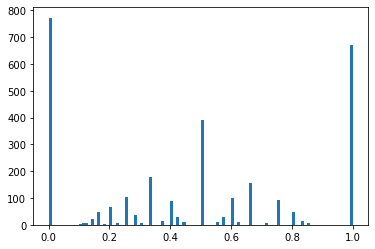

In [68]:
plt.hist(df_sim["Jaccard_Sim"], bins= 100)

In [69]:
median_jaccard_sim = df_sim["Jaccard_Sim"].median()
median_jaccard_sim

# This low value indicates that there is a degree of variation between the two sets of GO IDs in df_blast2go

0.5

In [70]:
mean_jaccard_sim = df_sim["Jaccard_Sim"].mean()
mean_jaccard_sim

# This low value indicates that there is a degree of variation between the two sets of GO IDs in df_blast2go

0.4674789688711588

(array([4.110e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 1.500e+01, 0.000e+00,
        3.900e+01, 0.000e+00, 2.000e+00, 0.000e+00, 7.700e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 1.200e+01, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 8.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 0.000e+00, 2.000e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.720e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.100e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        4.600e+01, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.500e+02, 0.000e+00, 1.000e+00,
        1.000e+00, 2.300e+01, 0.000e+0

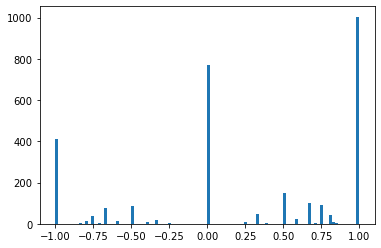

In [71]:
plt.hist(df_sim["Overlap_Sim"], bins= 100)

In [72]:
median_overlap_sim = df_sim["Overlap_Sim"].median()
median_overlap_sim

0.3333333333333333

In [73]:
mean_overlap_sim = df_sim["Overlap_Sim"].mean()
mean_overlap_sim

# The positive value indicates that the InterPro GO IDs is sometimes larger than the other set of GO IDs

0.24793556471824724

In [74]:
len(df_blast2go_cleaned.index)

3411

## Applying a more novel approach to the data transformation

--> reasoning: 
    - if we observe overlap to exactly mirror that of one loci, then, instead of noting that "0" as establishing both are equal sets, we append these "both equal" states for one over the other consistently. 
    - we also want to ensure that we take note of the cases of if one has go terms in situations where the other does not
    

In [75]:
locus_list = list(set(blast_go_loci_to_onto.keys()).intersection(set(go_feat_loci_to_onto.keys())))
first_go_holder = go_feat_loci_to_onto 
second_go_holder = blast_go_loci_to_onto 

df_difference_blast_feat_sims = build_Novel_Similarity_Analysis(locus_list, first_go_holder, second_go_holder)

df_difference_blast_feat_sims

,locus_id,First_GO_IDs,Second_GO_IDs,First Overlap,Overlap Difference,Second Overlap,Overlap_GO_IDs
0,EQU24_RS01095,"[GO:0015627, GO:0015628, GO:0016021]","[GO:0015627, GO:0015628, GO:0016021]",1.0,0.000000,1.000000,"{GO:0015627, GO:0015628, GO:0016021}"
1,EQU24_RS21740,"[GO:0015031, GO:0016021]","[GO:0015031, GO:0016021]",1.0,0.000000,1.000000,"{GO:0015031, GO:0016021}"
2,EQU24_RS13760,"[GO:0008168, GO:0032259]","[GO:0008168, GO:0032259]",1.0,0.000000,1.000000,"{GO:0008168, GO:0032259}"
3,EQU24_RS10525,"[GO:0004888, GO:0006935, GO:0007165, GO:0016021]","[GO:0004888, GO:0006935, GO:0007165, GO:0016021]",1.0,0.000000,1.000000,"{GO:0004888, GO:0007165, GO:0006935, GO:0016021}"
4,EQU24_RS12820,[GO:0003729],[GO:0003729],1.0,0.000000,1.000000,{GO:0003729}
...,...,...,...,...,...,...,...
2940,EQU24_RS20755,"[GO:0000103, GO:0004783, GO:0009337, GO:001934...","[GO:0000103, GO:0004783, GO:0009337, GO:001934...",1.0,0.100000,0.900000,"{GO:0020037, GO:0000103, GO:0070814, GO:005066..."
2941,EQU24_RS03750,"[GO:0006782, GO:0008883, GO:0050661]","[GO:0006782, GO:0008883, GO:0050661, GO:0055114]",1.0,0.250000,0.750000,"{GO:0006782, GO:0050661, GO:0008883}"
2942,EQU24_RS19785,"[GO:0097367, GO:1901135]","[GO:0005737, GO:0005975, GO:0008270, GO:000896...",0.5,0.333333,0.166667,{GO:0097367}
2943,EQU24_RS07470,[GO:0016779],[GO:0016779],1.0,0.000000,1.000000,{GO:0016779}


In [76]:
first_go_holder = go_feat_loci_to_onto 
second_go_holder = blast_go_loci_to_onto 

df_missing_loci_blast_feat = checkMissingLoci(first_go_holder, second_go_holder)
df_missing_loci_blast_feat

,loci,first,second
0,EQU24_RS00025,0,0
1,EQU24_RS00030,0,0
2,EQU24_RS00035,0,0
3,EQU24_RS00055,0,0
4,EQU24_RS00065,0,1
...,...,...,...
1423,EQU24_RS22095,0,0
1424,EQU24_RS22105,0,1
1425,EQU24_RS22110,0,0
1426,EQU24_RS22120,0,0


### Data Presentation

In [77]:
# Data Selection for Visualization

# NEW APPROACH --> USE DIFFERENCE OF OVERLAPS
# df_difference_blast_feat_sims   ====> between Blast2Go go ids and GoFeat

df_sim = df_difference_blast_feat_sims

(array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 6.000e+00, 2.000e+00, 1.742e+03, 3.590e+02,
        1.820e+02, 2.650e+02, 1.400e+01, 2.650e+02, 7.300e+01, 1.600e+01,
        1.100e+01, 1.000e+00]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

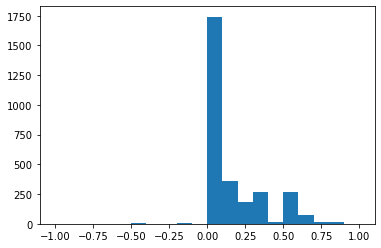

In [78]:
plt.hist(df_difference_blast_feat_sims["Overlap Difference"], range = [-1, 1], bins = 20)

In [79]:
# Summary of Averages

first_missing_mean = df_missing_loci_blast_feat["first"].mean()
first_missing_median = df_missing_loci_blast_feat["first"].median()
first_missing_num = df_missing_loci_blast_feat["first"].sum()
first_summary = "First List --> num = {}, mean = {}, median = {}".format(first_missing_num, first_missing_mean, first_missing_median)
print(first_summary)

second_missing_mean = df_missing_loci_blast_feat["second"].mean()
second_missing_median = df_missing_loci_blast_feat["second"].median()
second_missing_num = df_missing_loci_blast_feat["second"].sum()
second_summary = "Second List --> num = {}, mean = {}, median = {}".format(second_missing_num, second_missing_mean, second_missing_median)
print(second_summary)

First List --> num = 12, mean = 0.008403361344537815, median = 0.0
Second List --> num = 466, mean = 0.32633053221288516, median = 0.0


# Export Data

In [80]:
list_form_blast_go_loci_to_onto = [blast_go_loci_to_onto.keys(), blast_go_loci_to_onto.values()]
df_blast_go_loci_to_onto = pd.DataFrame(list_form_blast_go_loci_to_onto).T
df_blast_go_loci_to_onto.columns = ["loci", "go_terms"]
df_blast_go_loci_to_onto.to_csv("../data/go_terms/blast_2_go", index = False)

In [96]:
dict_blast2go_loci_to_go = dict(zip(df_blast_go_loci_to_onto['loci'], df_blast_go_loci_to_onto['go_terms']))

pickle.dump(dict_blast2go_loci_to_go, open('../data/go_terms/dict_blast2go_loci_to_go.pickle', 'wb'))

# Sanity Checks

In [82]:
y = list(df_blast2go_cleaned.iloc[0]["InterPro GO IDs"].split(";"))

In [531]:
y

['F:GO:0003677',
 ' F:GO:0003688',
 ' F:GO:0005524',
 ' P:GO:0006270',
 ' P:GO:0006275',
 ' F:GO:0043565']

In [532]:
x = list(df_blast2go_cleaned.iloc[5]["GO IDs"].split(";"))

In [533]:
x

['C:GO:0016020', ' F:GO:0022857', ' P:GO:0055085']

In [534]:
z = set(x).intersection(set(y))

In [535]:
z

set()

In [536]:
len(z) / len(set(x).union(set(y)))

0.0

In [537]:
len(z) / len(min(x, y))

0.0

In [538]:
min(x, y)

['C:GO:0016020', ' F:GO:0022857', ' P:GO:0055085']

In [539]:
go_term_holder = []

for locus in range(len(df_blast2go_cleaned.index)):

    
    locus_id = df_blast2go_cleaned.iloc[locus]["locus_id"]
    
    go_ids = list(df_blast2go_cleaned.iloc[locus]["GO IDs"].split(";"))
    interpro_go_ids = list(df_blast2go_cleaned.iloc[locus]["InterPro GO IDs"].split(";"))
    
    overlap_go_terms = set(go_ids).intersection(set(interpro_go_ids))
    
    jaccard_similarity = len(overlap_go_terms) / len(set(go_ids).union(set(interpro_go_ids)))
    
    overlap_similarity = 0
    
    if len(go_ids) > len(interpro_go_ids):
        overlap_similarity = -1 * len(overlap_go_terms) / len(set(interpro_go_ids))
    else: 
        overlap_similarity = len(overlap_go_terms) / len(set(go_ids))
        
    go_term_holder.append([locus_id, go_ids, interpro_go_ids, jaccard_similarity, overlap_similarity, overlap_go_terms])
    
df_blast2go_sims = pd.DataFrame(go_term_holder)

df_blast2go_sims.columns = ["locus_id", "GO_IDs", "Interpro_GO_IDs", "Jaccard_Sim", "Overlap_Sim", "Overlap_GO_IDs"]
df_blast2go_sims

,locus_id,GO_IDs,Interpro_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
0,EQU24_RS00005,"[F:GO:0003688, F:GO:0005524, C:GO:0005737, ...","[F:GO:0003677, F:GO:0003688, F:GO:0005524, ...",0.375000,0.600000,"{ P:GO:0006270, P:GO:0006275, F:GO:0005524}"
1,EQU24_RS00010,"[F:GO:0003677, F:GO:0003887, C:GO:0005737, ...","[F:GO:0003677, F:GO:0003887, P:GO:0006260, ...",0.625000,-1.000000,"{ F:GO:0008408, P:GO:0006260, C:GO:0009360, ..."
2,EQU24_RS00015,"[F:GO:0003697, F:GO:0005524, C:GO:0005737, ...","[F:GO:0003697, F:GO:0005524, P:GO:0006281]",0.500000,-1.000000,"{F:GO:0003697, F:GO:0005524, P:GO:0006281}"
3,EQU24_RS00020,"[F:GO:0003677, F:GO:0003918, F:GO:0005524, ...","[F:GO:0003677, F:GO:0003918, F:GO:0005524, ...",0.625000,-1.000000,"{ P:GO:0006265, C:GO:0005694, F:GO:0003918, ..."
4,EQU24_RS00040,"[F:GO:0015562, P:GO:0055085]","[F:GO:0015562, P:GO:0055085]",1.000000,1.000000,"{ P:GO:0055085, F:GO:0015562}"
...,...,...,...,...,...,...
3406,EQU24_RS22135,"[F:GO:0003924, F:GO:0005515, F:GO:0005525, ...","[F:GO:0003924, F:GO:0005515, F:GO:0005525, ...",0.666667,-1.000000,"{F:GO:0003924, F:GO:0005515, F:GO:0005525, ..."
3407,EQU24_RS22140,"[C:GO:0005886, P:GO:0015031, C:GO:0016021, ...","[C:GO:0016021, F:GO:0032977]",0.166667,-0.500000,{ F:GO:0032977}
3408,EQU24_RS22145,[C:GO:0005886],[no GO terms],0.000000,0.000000,{}
3409,EQU24_RS22150,"[F:GO:0000049, P:GO:0001682, F:GO:0004526, ...","[F:GO:0000049, F:GO:0004526, P:GO:0008033]",0.400000,-0.666667,"{ F:GO:0004526, F:GO:0000049}"


In [540]:
df_blast2go["GO IDs"][0]

'F:GO:0003688; F:GO:0005524; C:GO:0005737; P:GO:0006270; P:GO:0006275'

In [541]:
df_blast2go["InterPro GO IDs"][0]

'F:GO:0003677; F:GO:0003688; F:GO:0005524; P:GO:0006270; P:GO:0006275; F:GO:0043565'

In [542]:
df_gofeat["Gene onthology"][0]

'GO:0003688 - DNA replication origin binding|GO:0005524 - ATP binding|GO:0005737 - cytoplasm|GO:0006270 - DNA replication initiation|GO:0006275 - regulation of DNA replication'

In [588]:
df_expanded_tags_blast2go

,0,1,2
0,EQU24_RS00005,dnaA,chromosomal
1,EQU24_RS00010,,DNA
2,EQU24_RS00015,recF,DNA
3,EQU24_RS00020,gyrB,DNA
4,EQU24_RS00025,,hypothetical
...,...,...,...
4368,EQU24_RS22135,mnmE,tRNA
4369,EQU24_RS22140,yidC,membrane
4370,EQU24_RS22145,yidD,membrane
4371,EQU24_RS22150,rnpA,ribonuclease
